## Titanic - Machine Learning from Disaster

<img src="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg" alt="Titanic Disaster" style="width: 720px;"/>

<p style="text-align: center;">
  <small>
    [See <a href="https://www.kaggle.com/c/titanic/overview">Titanic - Machine Learning from Disaster (Kaggle URL)</a>]
  </small>
</p>

##### Overview

- object : The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
- evaluation<br>
  $Accuracy=\frac{TP + TN}{TP + TN + FP + FN}$
  - where TP = True positive; FP = False positive; TN = True negative; FN = False negative

##### Data

 * Survived : 0 = died, 1 = survived
<br>

 * Pclass : Ticket class for passengers
   - 1st = Upper
   - 2nd = Middle
   - 3rd = Lower
<br>

 * Sex : gender of passengers (composed of male and female)
<br>

 * Age : Passenger's age (if age less than 1, it's fractional)
<br>

 * Sibsp : The sibsp defines family relations in this way.
   - Sibling = brother, sister, stepbrother, stepsister
   - Spouse = husband, wife
<br>

 * Parch : The parch defines family relations 
   - Parent = mother, father
   - Child = daughter, son, stepdaughter, stepson
<br>

 * Ticket : Number of ticket
 <br>
 
 * Fare : Fare fee of Titanic
 <br>
 
 * cabin : Cabin number
 <br>
 
 * embarked : Port of Embarkation 
   - C = Cherbourg
   - Q = Queenstown
   - S = Southampton

### Collecting CSV data

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

In [58]:
train = pd.read_csv("../titanic/train.csv")
test = pd.read_csv("../titanic/test.csv")

train.shape, test.shape

((891, 12), (418, 11))

##### Check Nan Data & Data type(int, str)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [61]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### EDA

In [63]:
def barchart(feature):
    dead = train.loc[train['Survived'] == 0][feature].value_counts()
    survive = train.loc[train['Survived'] == 1][feature].value_counts()
    df = pd.DataFrame([survive, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,8))
    plt.xticks(rotation=0)

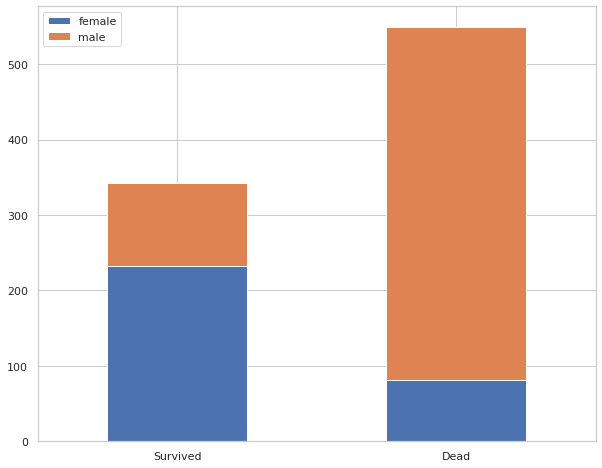

In [64]:
barchart('Sex')

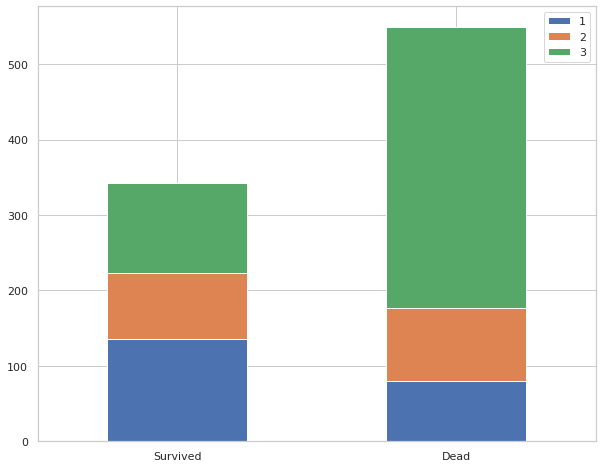

In [65]:
barchart('Pclass')

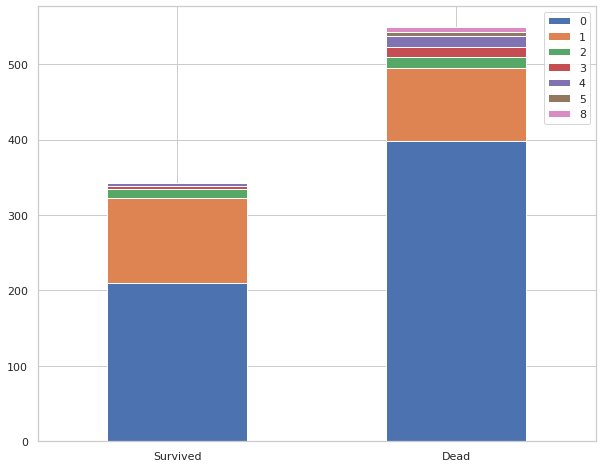

In [66]:
barchart('SibSp')

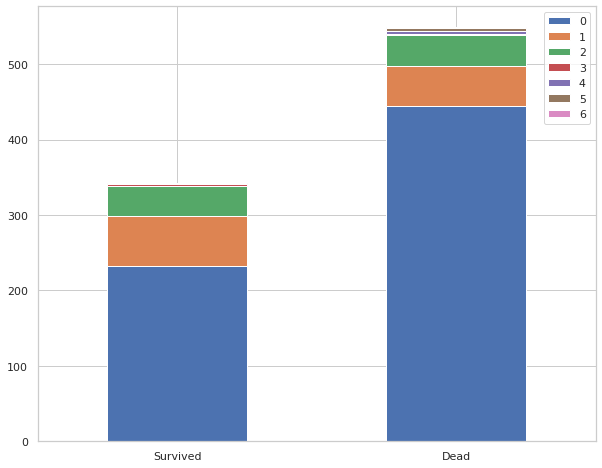

In [67]:
barchart('Parch')

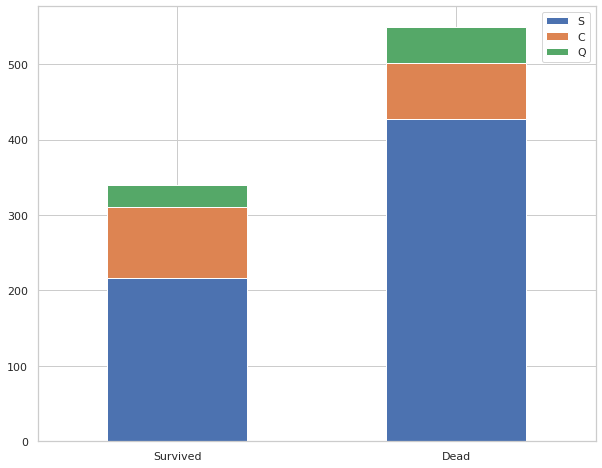

In [68]:
barchart('Embarked')

### Feature Engineering

#### Change data Format 

<br>

- String to Integer

- Sequantial to Categorical data

##### Name

In [69]:
dataset = [train, test]

for data in dataset:
    data['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [70]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [71]:
def divide_title(string):
    if string == "Mr":
        title_int = 0
    elif string == "Miss":
        title_int = 1
    elif string == "Mrs":
        title_int = 2
    else:
        title_int = 3
    return title_int

title_list=[]

for i in range(train.shape[0]):
    title_int = divide_title(train['Title'].iloc[i])
    title_list.append(title_int)

train['Title_int'] = pd.DataFrame (title_list)

title_list=[]

for i in range(test.shape[0]):
    title_int = divide_title(test['Title'].iloc[i])
    title_list.append(title_int)

test['Title_int'] = pd.DataFrame (title_list)

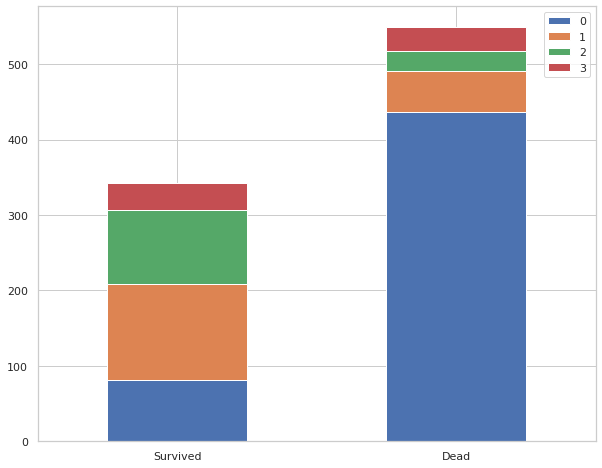

In [72]:
barchart('Title_int')

In [73]:
train.drop(columns=['Name', 'Title'], axis=1, inplace=True)
test.drop(columns=['Name', 'Title'], axis=1, inplace=True)

##### Sex

In [74]:
sex_mapping = {'male' : 0, 'female' : 1}

for data in dataset:
    data['Sex_int'] = data['Sex'].map(sex_mapping)

train.drop(columns='Sex', axis=1, inplace=True)
test.drop(columns='Sex', axis=1, inplace=True)

##### Age

In [75]:
train['Age'].isnull().sum(), test['Age'].isnull().sum()

(177, 86)

In [76]:
for data in dataset:
    data['Age'].fillna(data.groupby('Title_int')['Age'].transform('median'), inplace=True)
train['Age'].isnull().sum(), test['Age'].isnull().sum()

(0, 0)

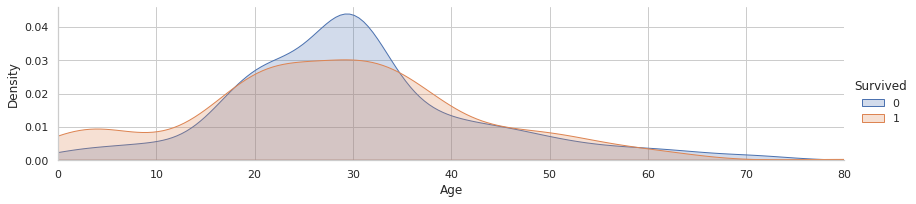

In [77]:
facet = sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
plt.xlim(0, train['Age'].max())
facet.add_legend()

In [78]:
age_quantile = train['Age'].quantile([0.2, 0.4, 0.6, 0.8])

for data in dataset:
    data.loc[data['Age'] <= age_quantile.iloc[0], 'Age_enc'] = 0
    data.loc[(data['Age'] > age_quantile.iloc[0]) & (data['Age'] <= age_quantile.iloc[1]), 'Age_enc'] = 1
    data.loc[(data['Age'] > age_quantile.iloc[1])&(data['Age'] <= age_quantile.iloc[2]), 'Age_enc'] = 2
    data.loc[(data['Age'] > age_quantile.iloc[2])&(data['Age'] <= age_quantile.iloc[3]), 'Age_enc'] = 3
    data.loc[(data['Age'] > age_quantile.iloc[3]), 'Age_enc'] = 4

for data in dataset:
    data.drop(columns='Age', axis=1, inplace=True)

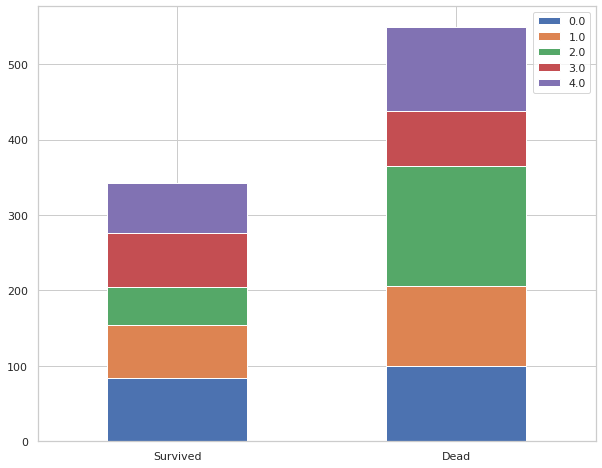

In [79]:
barchart('Age_enc')

##### Embarked

In [80]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:>

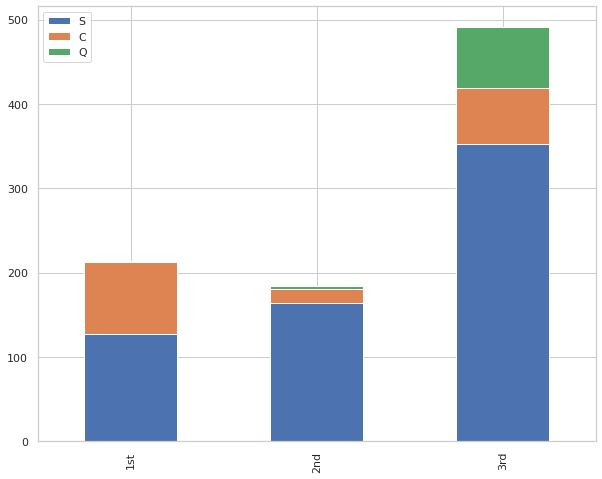

In [81]:
pclass1 = train.loc[train['Pclass'] == 1]['Embarked'].value_counts()
pclass2 = train.loc[train['Pclass'] == 2]['Embarked'].value_counts()
pclass3 = train.loc[train['Pclass'] == 3]['Embarked'].value_counts()

pclass = pd.DataFrame([pclass1, pclass2, pclass3], index=['1st', '2nd', '3rd'])
pclass.plot(kind='bar', stacked=True, figsize=(10,8))

In [82]:
for data in dataset:
    data['Embarked'].fillna('S', inplace=True)

In [83]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}

for data in dataset:
    data['Embarked_enc'] = data['Embarked'].map(embarked_mapping)
    data.drop(columns='Embarked', axis=1, inplace=True)

In [84]:
for data in dataset:
    data['Fare'].fillna(data.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [85]:
fare_quantile = train['Fare'].quantile([0.2, 0.4, 0.6, 0.8])

for data in dataset:
    data.loc[data['Fare'] <= fare_quantile.iloc[0], 'Fare_enc'] = 0
    data.loc[(data['Fare'] > fare_quantile.iloc[0]) & (data['Fare'] <= fare_quantile.iloc[1]), 'Fare_enc'] = 1
    data.loc[(data['Fare'] > fare_quantile.iloc[1])&(data['Fare'] <= fare_quantile.iloc[2]), 'Fare_enc'] = 2
    data.loc[(data['Fare'] > fare_quantile.iloc[2])&(data['Fare'] <= fare_quantile.iloc[3]), 'Fare_enc'] = 3
    data.loc[(data['Fare'] > fare_quantile.iloc[3]), 'Fare_enc'] = 4
    data.drop(columns='Fare', axis=1, inplace=True)

##### Cabin

In [86]:
train['Cabin'].isna().sum()

687

In [87]:
for data in dataset:
    data.drop(columns='Cabin', axis=1, inplace=True)

##### Family Size

In [88]:
train['familysize'] = train['SibSp'] + train['Parch'] + 1
test['familysize'] = test['SibSp'] + test['Parch'] + 1

In [89]:
for data in dataset:
    data.drop(columns=['SibSp', 'Parch'], axis=1, inplace=True)

##### Ticket

In [90]:
for data in dataset:
    data.drop(columns='Ticket', axis=1, inplace=True)

In [91]:
target = train['Survived']
train = train.drop(columns=['Survived', 'PassengerId'])

### ML Modeling

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn.svm import SVC

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf_list = [DT(), KNN(n_neighbors=5, n_jobs=-1), RFC(), GBM(), SVC()]

for clf in clf_list:
    score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=-1, scoring='accuracy').mean()
    print(f"{str(clf)} Score : {np.round(score,2)}")

DecisionTreeClassifier() Score : 0.79
KNeighborsClassifier(n_jobs=-1) Score : 0.8
RandomForestClassifier() Score : 0.81
GradientBoostingClassifier() Score : 0.83
SVC() Score : 0.82


In [101]:
clf = RFC()
clf.fit(train, target)

test1 = test.drop(columns='PassengerId')

result = clf.predict(test1)

In [102]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    'Survived' : result
})
submission.to_csv('submission.csv', index=False)

In [103]:
submission = pd.read_csv("./submission.csv")
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
